In [108]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from scipy.ndimage import median_filter

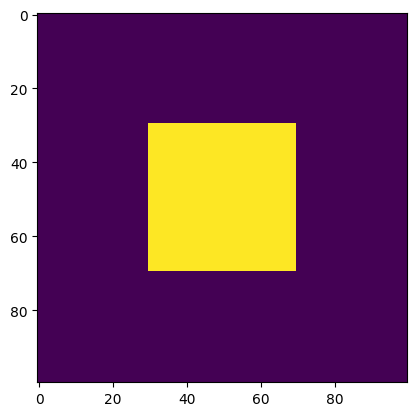

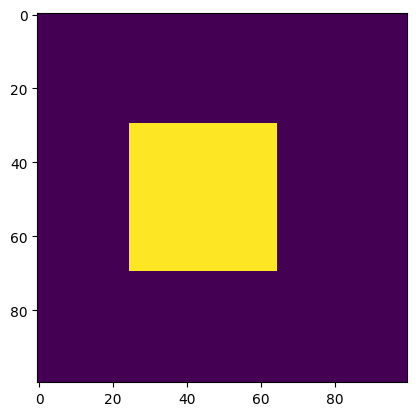

In [65]:
# --- Create Synthetic Stereo Images (100x100) ---

# Create left image: Black image with a white square (from (30,30) to (70,70))
left_image = np.zeros((100, 100), dtype=np.uint8)
left_image[30:70, 30:70] = 255

# Create right image: Shift the white square 5 pixels to the left relative to the left image
# (This simulates a scene where the object is closer)
right_image = np.zeros_like(left_image)
# In the right image, the square appears shifted:
right_image[30:70, 25:65] = 255

plt.imshow(left_image)
plt.show()
plt.imshow(right_image)
plt.show()

# --- Create Synthetic Stereo Images (100x100) ---

# # Create left image: Black image with a white square (from (30,30) to (70,70))
# left_image = np.zeros((20, 20), dtype=np.uint8)
# left_image[6:14, 6:14] = 255

# # Create right image: Shift the white square 5 pixels to the left relative to the left image
# # (This simulates a scene where the object is closer)
# right_image = np.zeros_like(left_image)
# # In the right image, the square appears shifted:
# right_image[6:14, 5:13] = 255

# plt.imshow(left_image)
# plt.show()
# plt.imshow(right_image)
# plt.show()


In [120]:
def compute_disparity(left, right, block_size = 5, max_disparity = 10):
    half_block = block_size // 2
    height, width = left.shape
    disparity_map = np.zeros((height, width), dtype = np.float32)
    print(disparity_map.shape)
    
    for i in range(half_block, height - half_block):
        for j in range(half_block, width - half_block):
            best_disp = 0
            min_diff = float('inf')
            block_left = left[i - half_block: i + half_block + 1, j - half_block: j + half_block + 1]
            for d in range(max_disparity):
                if j - d - half_block < 0:
                    continue
                    
                block_right = right[i - half_block: i + half_block + 1, j - half_block - d: j + half_block + 1 - d]
                
                if i ==5:
                    if np.sum(block_left) != np.sum(block_right):
                        pass # print(np.sum(block_right))
#                         print(block_left)
#                         print(block_right)
#                         print(block_right - block_left)
#                         print(np.abs(block_right - block_left))
#                         print(np.sum(np.abs(block_right - block_left)))
#                         print()
                
                diff = np.sum(np.abs(block_left.astype(np.int16) - block_right.astype(np.int16)))
                
                if diff < min_diff:
                    min_diff = diff
                    best_disp = d
                    
            disparity_map[i, j] = best_disp
            
    return disparity_map

(288, 384)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


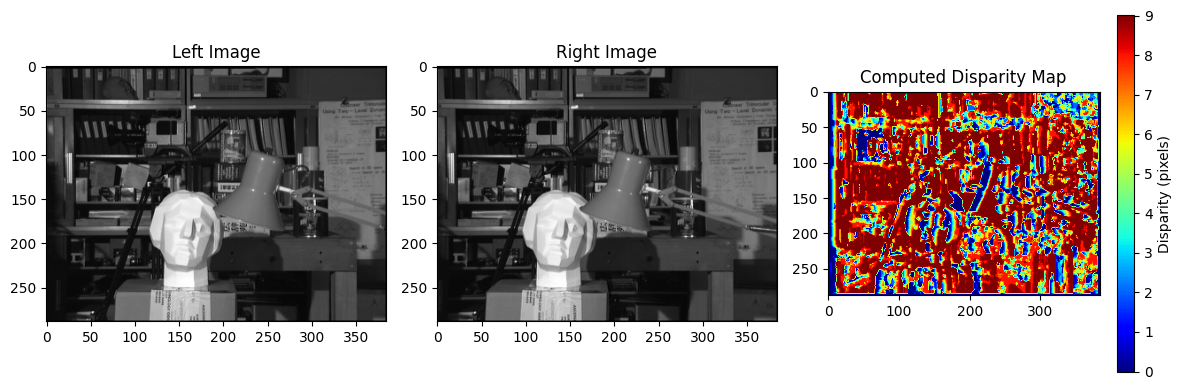

In [121]:
# --- Compute Disparity Map ---
disparity_map = compute_disparity(left_image, right_image, block_size=5, max_disparity=10)

print(disparity_map)
# --- Visualize the Results ---

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(left_image, cmap='gray')
plt.title("Left Image")

plt.subplot(1,3,2)
plt.imshow(right_image, cmap='gray')
plt.title("Right Image")

plt.subplot(1,3,3)
plt.imshow(disparity_map, cmap='jet')  # 'jet' colormap to show depth variation
plt.colorbar(label='Disparity (pixels)')
plt.title("Computed Disparity Map")

plt.tight_layout()
plt.show()

(288, 384)


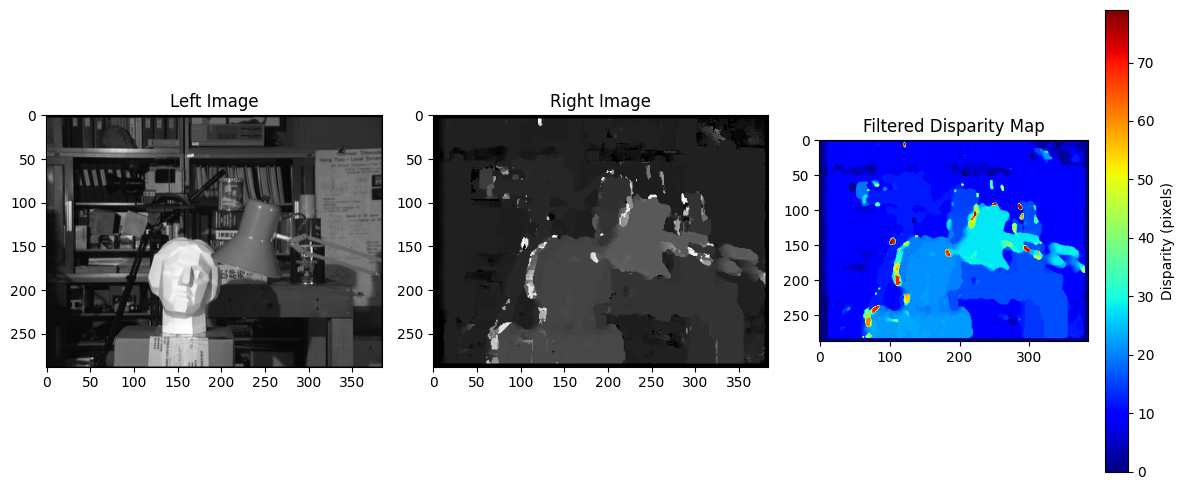

In [128]:
left_image = cv2.imread('images/left.png', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('images/right.png', cv2.IMREAD_GRAYSCALE)

# --- Compute Disparity ---
disparity_map = compute_disparity(left_image, right_image, block_size=9, max_disparity=80)

# --- Apply Median Filtering to Reduce Noise ---
filtered_disparity = median_filter(disparity_map, size=5)  # 5x5 median filter

# --- Visualize Results ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(left_image, cmap='gray')
plt.title("Left Image")

plt.subplot(1, 3, 2)
plt.imshow(disparity_map, cmap='gray')
plt.title("Right Image")

plt.subplot(1, 3, 3)
plt.imshow(filtered_disparity, cmap='jet')
plt.colorbar(label="Disparity (pixels)")
plt.title("Filtered Disparity Map")

plt.tight_layout()
plt.show()

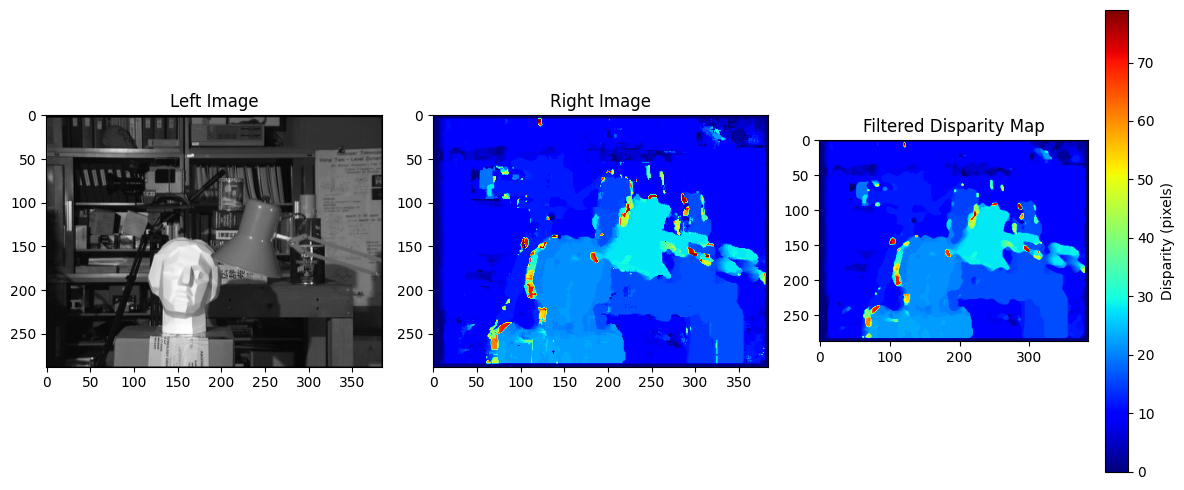

In [124]:
# --- Visualize Results ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(left_image, cmap='gray')
plt.title("Left Image")

plt.subplot(1, 3, 2)
plt.imshow(disparity_map, cmap='jet')
plt.title("Right Image")

plt.subplot(1, 3, 3)
plt.imshow(filtered_disparity, cmap='jet')
plt.colorbar(label="Disparity (pixels)")
plt.title("Filtered Disparity Map")

plt.tight_layout()
plt.show()